# Установка нужных библиотек

In [112]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !git clone -qq https://github.com/Intelligent-Systems-Phystech/ProjectTemplate.git /tmp/repo
    !python3 -m pip install -qq /tmp/repo/src/ && rm -rf /tmp/repo

# Импорт библиотек

In [147]:
import numpy as np
from matplotlib import pylab as plt
from importlib import reload

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Настройка окружения

In [114]:
if IN_COLAB:
    figures = '.'
else:
    figures = '../figures'

## 1. Квадратичная задача

### Описание задачи

In [136]:
func_name = "quadratic"
d = 100
L = 1000
mu = 1
sigma = 1e-6

SEED = 18
args = init_experiment(func_name, d, seed=SEED, L=L, mu=mu)

sett = R()
np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

### Поиск точного решения

In [116]:
x_sol = np.linalg.inv(args['A']) @ args['b']

### Детерминированный случай

In [106]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="det", args=args)

In [107]:
def learning_rate_GD(k):
    return 1./L

def learning_rate_AcceleratedGD(k):
    return 1./L

def learning_rate_Nesterov(k):
    return 1./L

100%|█████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11734.37it/s]


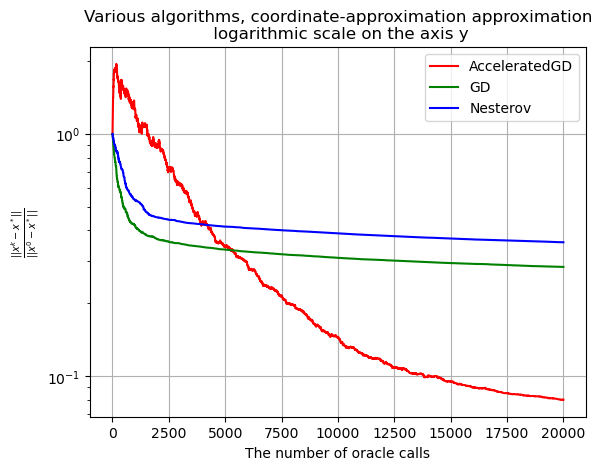

In [108]:
np.random.seed(SEED)
gamma=1e-4
coordinate = CoordinateApproximator(oracle, gamma=gamma)

p = 0.2
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.2
num_calls = 2 * 10**4

optimizers_list = [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
    GDOptimizer(coordinate, learning_rate_GD, x_0, sett, x_sol, max_oracle_calls=num_calls),
    NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, x_sol, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list)
# make_err_plot(optimizers_list, save_name=f"Deterministic_quadratic_AGD_GD_Nesterov_{SEED}", title='')

Подбор оптимального $p$.

100%|█████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10122.78it/s]


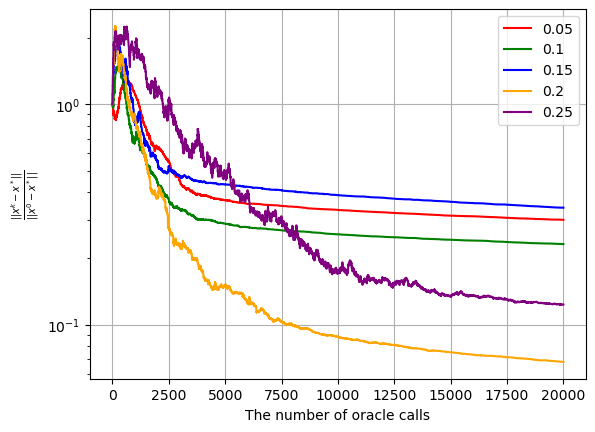

In [109]:
optimizers_list = []

for p in [0.05, 0.1, 0.15, 0.2, 0.25]:
    beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
    eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
    theta = (p / eta - 1)/(beta * p / eta - 1)
    optimizers_list += [AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls)]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=[0.05, 0.1, 0.15, 0.2, 0.25])

Подбор оптимального momentum.

100%|██████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9902.34it/s]


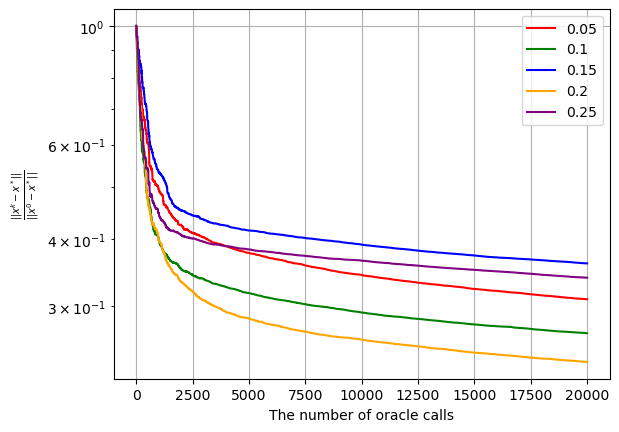

In [110]:
optimizers_list = []

for momentum in [0.05, 0.1, 0.15, 0.2, 0.25]:
    optimizers_list += [NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, x_sol, max_oracle_calls=num_calls)]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=[0.05, 0.1, 0.15, 0.2, 0.25])

Сравнение разных аппроксимаций.

100%|██████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6910.13it/s]


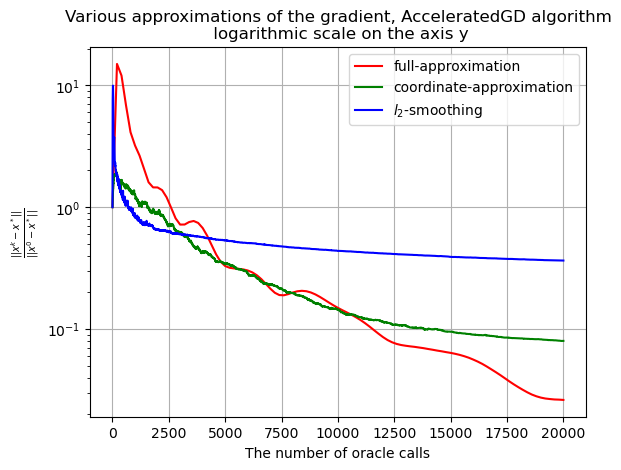

In [111]:
num_calls = 2 * 10**4

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)
turtle = TurtleApproximator(oracle, gamma=gamma)

optimizers_list = [
    AcceleratedGDOptimizer(turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls)
]

p = 0.2
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)
lame = LameApproximator(oracle, gamma=gamma)

optimizers_list += [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
    AcceleratedGDOptimizer(lame, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list)

### Стохастический случай

In [137]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

100%|█████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13854.49it/s]


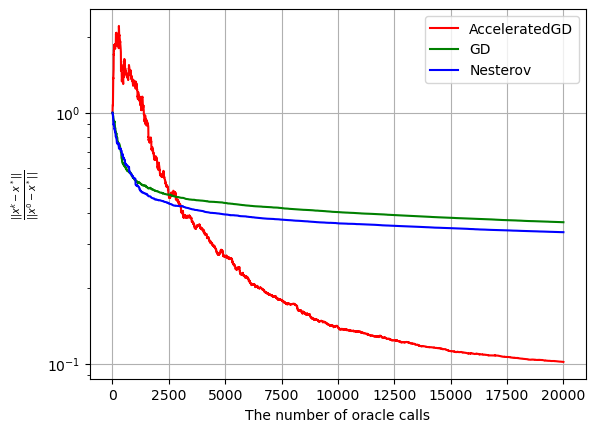

In [138]:
np.random.seed(SEED)
gamma=1e-4
coordinate = CoordinateApproximator(oracle, gamma=gamma)

p = 0.2
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.2
num_calls = 2 * 10**4

optimizers_list = [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
    GDOptimizer(coordinate, learning_rate_GD, x_0, sett, x_sol, max_oracle_calls=num_calls),
    NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, x_sol, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list)
# make_err_plot(optimizers_list, save_name=f"Stochastic_quadratic_AGD_GD_Nesterov_{SEED}", title='')

## 2. Логистическая регрессия

In [129]:
func_name = "mushrooms"
d = 112
SEED = 18

sigma = 1e-6
sett = L2Ball(radius=0.5)
mu = 0.1
L = 20

args = init_experiment(func_name, d, sigma=sigma, alpha=mu)

np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

### Детерминированный случай

In [130]:
oracle = ZO_oracle(func_name, sigma=sigma, oracle_mode="det", args=args)

In [131]:
def learning_rate_GD(k):
    return 1./L

def learning_rate_AcceleratedGD(k):
    return 1./L

def learning_rate_Nesterov(k):
    return 1./L

100%|███████████████████████████████████████████████| 10000/10000 [00:40<00:00, 244.09it/s]


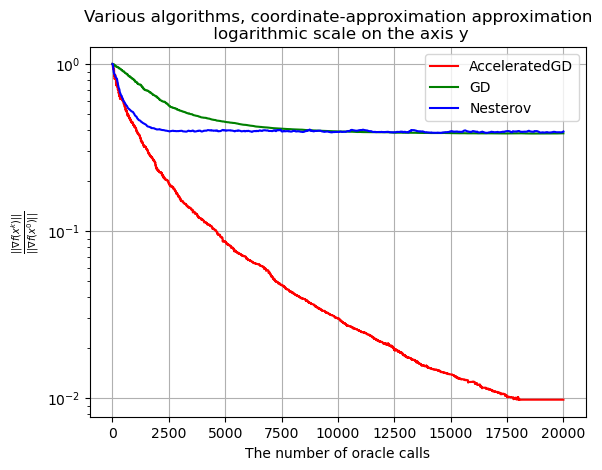

In [132]:
gamma=1e-4
coordinate = CoordinateApproximator(oracle, gamma=gamma)

np.random.seed(SEED)

p = 0.7
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.8

num_calls = 2 * 10**4

optimizers_list = [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
    GDOptimizer(coordinate, learning_rate_GD, x_0, sett, max_oracle_calls=num_calls),
    NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list)
# make_err_plot(optimizers_list, title='', save_name=f'Non_stochastic_Logreg_AGD_GD_Nesterov_{SEED}_{sigma}_{gamma}')

100%|█████████████████████████████████████████████████| 5000/5000 [00:15<00:00, 329.96it/s]


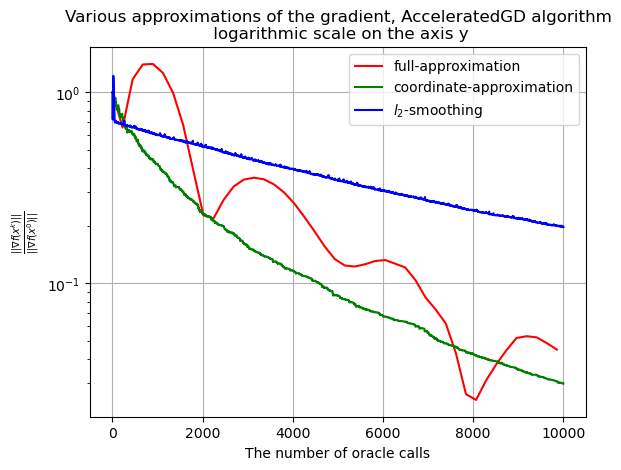

In [73]:
np.random.seed(SEED)

coordinate = CoordinateApproximator(oracle, gamma=gamma)
turtle = TurtleApproximator(oracle, gamma=gamma)
lame = LameApproximator(oracle, gamma=gamma)
num_calls = 10**4

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

optimizers_list =[
    AcceleratedGDOptimizer(turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
]

p = 0.7
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)


optimizers_list += [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
    AcceleratedGDOptimizer(lame, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list)

100%|███████████████████████████████████████████████| 10000/10000 [00:28<00:00, 349.14it/s]


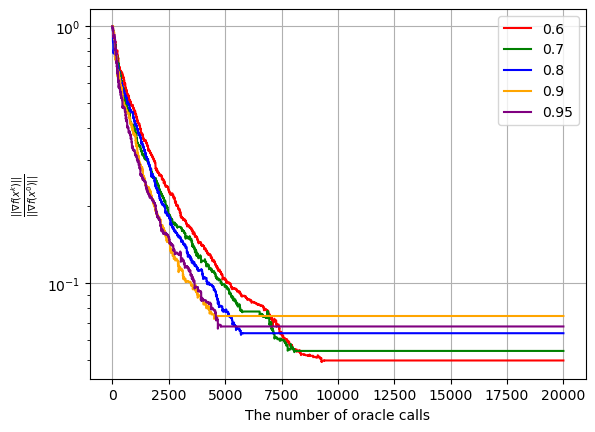

In [68]:
optimizers_list = []

for p in [0.6, 0.7, 0.8, 0.9, 0.95]:
    beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
    eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
    theta = (p / eta - 1)/(beta * p / eta - 1)
    optimizers_list += [AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls)]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=[0.6, 0.7, 0.8, 0.9, 0.95])

100%|███████████████████████████████████████████████| 10000/10000 [00:28<00:00, 346.88it/s]


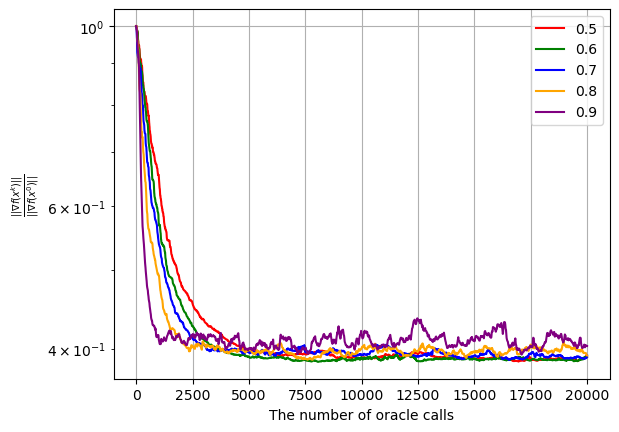

In [69]:
optimizers_list = []

for momentum in [0.5, 0.6, 0.7, 0.8, 0.9]:
    optimizers_list += [NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, max_oracle_calls=num_calls),]

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=[0.5, 0.6, 0.7, 0.8, 0.9])

100%|███████████████████████████████████████████████| 10000/10000 [00:34<00:00, 289.19it/s]


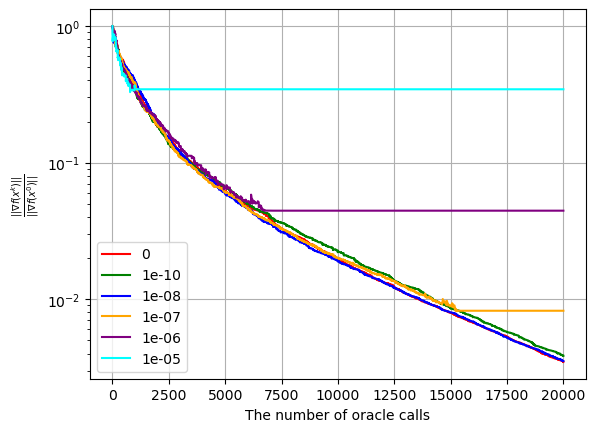

In [71]:
gamma=1e-5

np.random.seed(SEED)

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

num_calls =  2 * 10**4

optimizers_list = []

for sigma in [0, 1e-10, 1e-8, 1e-7, 1e-6, 1e-5]:
    _oracle = ZO_oracle(func_name, sigma=sigma, oracle_mode="det", args=args)
    coordinate = CoordinateApproximator(_oracle, gamma=gamma)
    optimizers_list.append(AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls))


for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=[0, 1e-10, 1e-8, 1e-7, 1e-6, 1e-5], title=None)

### Стохастический случай

In [133]:
oracle = ZO_oracle(func_name, sigma=sigma, oracle_mode="opf", args=args)

100%|███████████████████████████████████████████████| 10000/10000 [00:29<00:00, 343.32it/s]


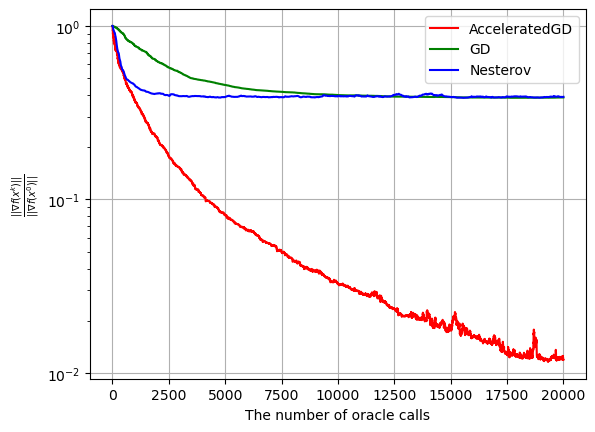

In [135]:
gamma=1e-4
coordinate = CoordinateApproximator(oracle, gamma=gamma)

np.random.seed(SEED)

p = 0.7
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

momentum = 0.8

num_calls = 2 * 10**4

optimizers_list = [
    AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
    GDOptimizer(coordinate, learning_rate_GD, x_0, sett, max_oracle_calls=num_calls),
    NesterovOptimizer(coordinate, learning_rate_Nesterov, x_0, momentum, sett, max_oracle_calls=num_calls),
]

for opt in optimizers_list:
    opt.optimize()

# make_err_plot(optimizers_list)
make_err_plot(optimizers_list, title='', save_name=f'Stochastic_Logreg_AGD_GD_Nesterov_{SEED}_{sigma}_{gamma}')

# Анализ ошибки

## Квадратичная задача

In [148]:
func_name = "quadratic"
d = 100
L = 1000
mu = 1
sigma = 1e-6

SEED = 18
args = init_experiment(func_name, d, seed=SEED, L=L, mu=mu)

sett = R()
np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [149]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="det", args=args)
x_sol = np.linalg.inv(args['A']) @ args['b']

In [150]:
def learning_rate_AcceleratedGD(k):
    return 0.75/L

In [151]:
turtle = TurtleApproximator(oracle, gamma=gamma)
coordinate = CoordinateApproximator(oracle, gamma=gamma)
lame = LameApproximator(oracle, gamma=gamma)
true = TrueGradientApproximator(args=args)

seed = 18
np.random.seed(seed)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

num_calls = 10**4

100%|████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 7427.09it/s]


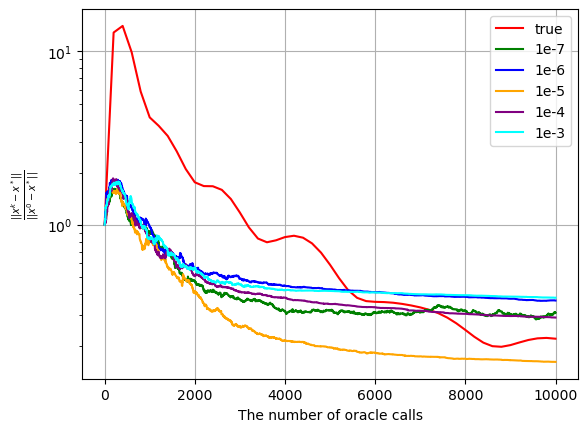

In [153]:
p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)
optimizers_list = [
    AcceleratedGDOptimizer(true, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
]

p = 0.15
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

for gamma in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]:
    coordinate = CoordinateApproximator(oracle, gamma=gamma)
    optimizers_list.append(AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls))

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=['true', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2'])#, save_name='Error_analysis_quadratic_sigma=1e-6')

100%|███████████████████████████████████████████████████| 100/100 [00:00<00:00, 121.04it/s]


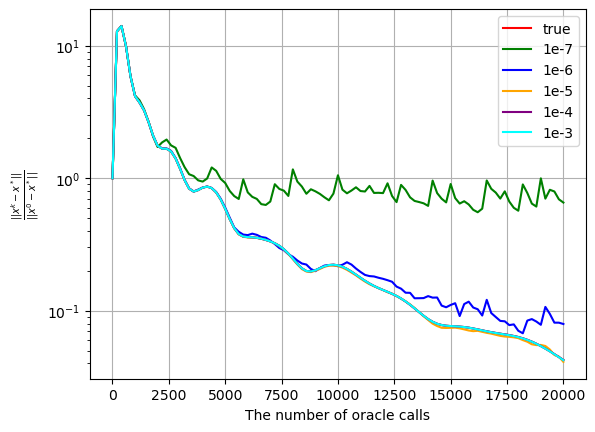

In [155]:
num_calls=2 * 10**4
p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)
optimizers_list = [
    AcceleratedGDOptimizer(true, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls),
]

p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

for gamma in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]:
    turtle = TurtleApproximator(oracle, gamma=gamma)
    optimizers_list.append(AcceleratedGDOptimizer(turtle, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, x_sol, max_oracle_calls=num_calls))

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=['true', '1e-7', '1e-6', '1e-5', '1e-4', '1e-3', '1e-2'])#, save_name='Error_analysis_quadratic_sigma=1e-6')

### Логистическая регрессия

In [157]:
func_name = "mushrooms"
d = 112
SEED = 18


sigma = 1e-6
sett = L2Ball(radius=0.5)
mu = 0.1
L = 20

args = init_experiment(func_name, d, sigma=sigma, alpha=mu)

np.random.seed(SEED)
x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0) * 0.5

In [158]:
oracle = ZO_oracle(func_name, sigma=sigma, oracle_mode="det", args=args)
turtle = TurtleApproximator(oracle, gamma=gamma)
coordinate = CoordinateApproximator(oracle, gamma=gamma)
lame = LameApproximator(oracle, gamma=gamma)
true = TrueGradientApproximator(func_name='mushrooms', args=args)

In [161]:
def learning_rate_AcceleratedGD(k):
    return 1./L

100%|█████████████████████████████████████████████████| 5000/5000 [00:15<00:00, 329.41it/s]


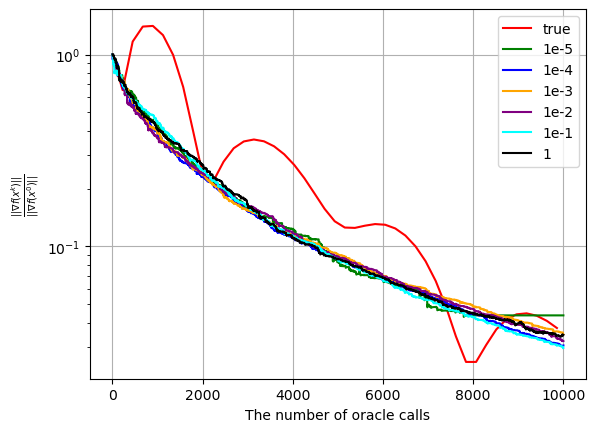

In [162]:
num_calls=10**4
p = 0.9
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)
optimizers_list = [
    AcceleratedGDOptimizer(true, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls),
]

p = 0.7
beta = p * (mu * learning_rate_AcceleratedGD(0))**0.5
eta = 1/(mu * learning_rate_AcceleratedGD(0))**0.5
theta = (p / eta - 1)/(beta * p / eta - 1)

for gamma in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]:
    coordinate = CoordinateApproximator(oracle, gamma=gamma)
    optimizers_list.append(AcceleratedGDOptimizer(coordinate, learning_rate_AcceleratedGD, x_0, theta, eta, beta, p, sett, max_oracle_calls=num_calls))

for opt in optimizers_list:
    opt.optimize()

make_err_plot(optimizers_list, labels=['true', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '1'])

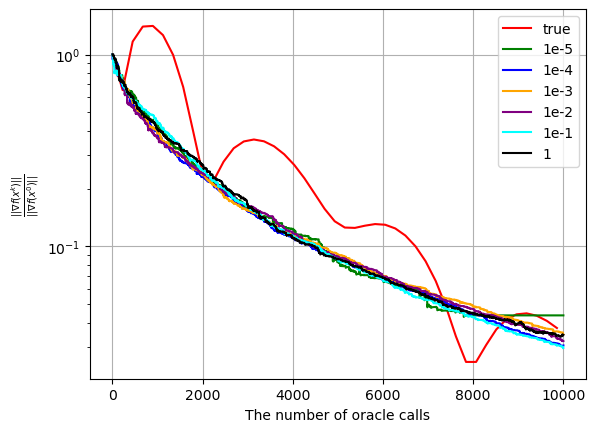

In [163]:
make_err_plot(optimizers_list, labels=['true', '1e-5', '1e-4', '1e-3', '1e-2', '1e-1', '1'], save_name='Error_analysis_logreg_sigma=1e-6')